In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가

In [3]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타켓 :', data[1,0])
#print('이미지(28*28을 1차원으로) :', data[0, 1:].reshape(28,28))

타켓 : 0.0


In [5]:
for row in data[1, 1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

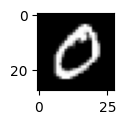

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [7]:
# %pip install opencv-contrib-python

In [8]:
# %pip install opencv-python

In [9]:
# 칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('data/image.jpg', cv2.IMREAD_GRAYSCALE) # 흑백포맷으로 읽기
print(image_gray.shape)
print(type(image_gray))

(183, 275)
<class 'numpy.ndarray'>


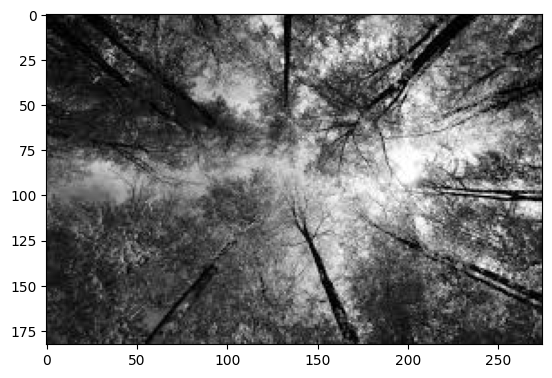

In [10]:
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
print(y_train[0])
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

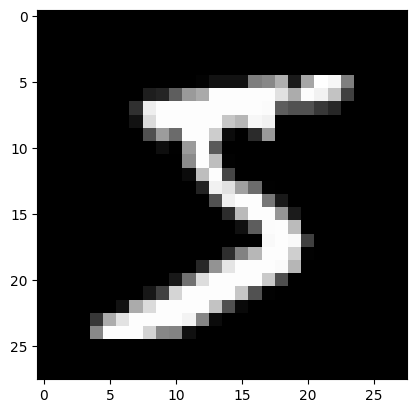

In [13]:
plt.imshow(X_train[0], cmap='gray')

In [14]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [15]:
# 학습셋(5만개:fit용), 검증셋(만:fit용), 테스트셋(만:평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [16]:
# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [17]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [18]:
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[4 8]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


# 2. 모델 구성

In [19]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [20]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습

In [21]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 1s 33ms/step - loss: 2.3037 - accuracy: 0.1414 - val_loss: 2.2970 - val_accuracy: 0.1333
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2856 - accuracy: 0.1271 - val_loss: 2.2871 - val_accuracy: 0.1067
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2661 - accuracy: 0.1471 - val_loss: 2.2716 - val_accuracy: 0.1133
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2447 - accuracy: 0.1457 - val_loss: 2.2600 - val_accuracy: 0.1100
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2244 - accuracy: 0.1443 - val_loss: 2.2464 - val_accuracy: 0.1433
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2031 - accuracy: 0.1614 - val_loss: 2.2285 - val_accuracy: 0.1600
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1797 - accuracy: 0.1586 - val_loss: 2.2063 - val_accuracy: 0.1833
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 1.3735 - accuracy: 0.5400 - val_loss: 1.8107 - val_accuracy: 0.4067
Epoch 118/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3710 - accuracy: 0.5371 - val_loss: 1.8078 - val_accuracy: 0.4133
Epoch 119/500
7/7 [==============================] - 0s 8ms/step - loss: 1.3689 - accuracy: 0.5357 - val_loss: 1.8151 - val_accuracy: 0.4100
Epoch 120/500
7/7 [==============================] - 0s 8ms/step - loss: 1.3650 - accuracy: 0.5486 - val_loss: 1.8139 - val_accuracy: 0.4033
Epoch 121/500
7/7 [==============================] - 0s 6ms/step - loss: 1.3623 - accuracy: 0.5429 - val_loss: 1.8103 - val_accuracy: 0.4100
Epoch 122/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3592 - accuracy: 0.5457 - val_loss: 1.8102 - val_accuracy: 0.4100
Epoch 123/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3563 - accuracy: 0.5486 - val_loss: 1.8133 - val_accuracy: 0.4067
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 1.1078 - accuracy: 0.6500 - val_loss: 1.8483 - val_accuracy: 0.4667
Epoch 234/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1057 - accuracy: 0.6600 - val_loss: 1.8577 - val_accuracy: 0.4500
Epoch 235/500
7/7 [==============================] - 0s 9ms/step - loss: 1.1047 - accuracy: 0.6700 - val_loss: 1.8524 - val_accuracy: 0.4667
Epoch 236/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1024 - accuracy: 0.6557 - val_loss: 1.8534 - val_accuracy: 0.4700
Epoch 237/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1007 - accuracy: 0.6629 - val_loss: 1.8597 - val_accuracy: 0.4633
Epoch 238/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1000 - accuracy: 0.6514 - val_loss: 1.8584 - val_accuracy: 0.4633
Epoch 239/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0968 - accuracy: 0.6600 - val_loss: 1.8614 - val_accuracy: 0.4567
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.9409 - accuracy: 0.7171 - val_loss: 1.9869 - val_accuracy: 0.4500
Epoch 350/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9384 - accuracy: 0.7214 - val_loss: 1.9883 - val_accuracy: 0.4533
Epoch 351/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9377 - accuracy: 0.7257 - val_loss: 1.9907 - val_accuracy: 0.4533
Epoch 352/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9361 - accuracy: 0.7243 - val_loss: 1.9921 - val_accuracy: 0.4533
Epoch 353/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9351 - accuracy: 0.7257 - val_loss: 1.9869 - val_accuracy: 0.4467
Epoch 354/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9352 - accuracy: 0.7171 - val_loss: 2.0035 - val_accuracy: 0.4467
Epoch 355/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9335 - accuracy: 0.7243 - val_loss: 1.9889 - val_accuracy: 0.4500
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.8213 - accuracy: 0.7586 - val_loss: 2.2101 - val_accuracy: 0.4400
Epoch 466/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8204 - accuracy: 0.7586 - val_loss: 2.2252 - val_accuracy: 0.4433
Epoch 467/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8197 - accuracy: 0.7557 - val_loss: 2.2235 - val_accuracy: 0.4467
Epoch 468/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8202 - accuracy: 0.7557 - val_loss: 2.2267 - val_accuracy: 0.4433
Epoch 469/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8185 - accuracy: 0.7614 - val_loss: 2.2159 - val_accuracy: 0.4467
Epoch 470/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8179 - accuracy: 0.7614 - val_loss: 2.2314 - val_accuracy: 0.4500
Epoch 471/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8159 - accuracy: 0.7586 - val_loss: 2.2278 - val_accuracy: 0.4433
Epoch 472/500
7/7 [========

# 5. 모델 평가하기

In [22]:
# 학습 과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

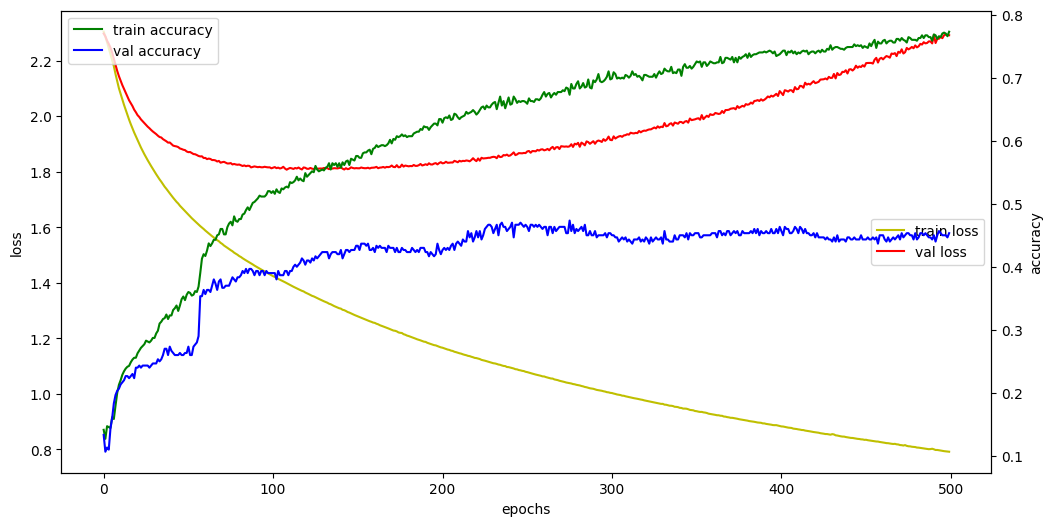

In [23]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [24]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 1.8655691146850586
accuracy : 0.4779999852180481


# ※ 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data추가, dropout, 활성화함수relu계열, tanh)
- epoch 조정
- optimizer 변경

Epoch 1/50
500/500 [==============================] - 16s 29ms/step - loss: 0.2716 - accuracy: 0.9167 - val_loss: 0.1215 - val_accuracy: 0.9629
Epoch 2/50
500/500 [==============================] - 12s 25ms/step - loss: 0.1243 - accuracy: 0.9614 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 3/50
500/500 [==============================] - 14s 29ms/step - loss: 0.0937 - accuracy: 0.9715 - val_loss: 0.0900 - val_accuracy: 0.9759
Epoch 4/50
500/500 [==============================] - 14s 28ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.0739 - val_accuracy: 0.9777
Epoch 5/50
500/500 [==============================] - 16s 32ms/step - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.0831 - val_accuracy: 0.9770
Epoch 6/50
500/500 [==============================] - 15s 30ms/step - loss: 0.0619 - accuracy: 0.9806 - val_loss: 0.0725 - val_accuracy: 0.9797
Epoch 7/50
500/500 [==============================] - 14s 29ms/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0936 - val_accuracy:

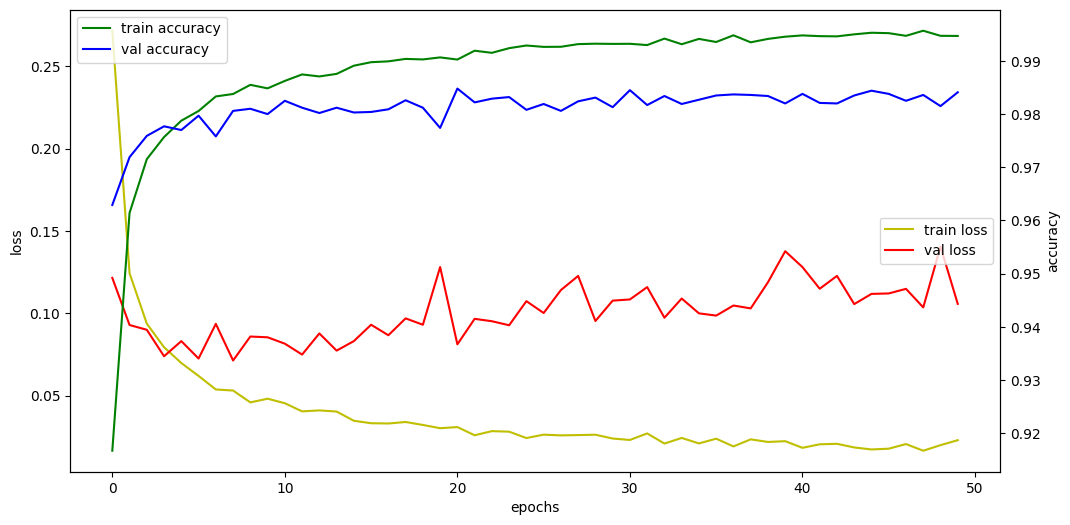

CPU times: total: 58min 17s
Wall time: 11min 56s


In [25]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
# train_idx = np.random.choice(50000, 700)
# val_idx  = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X   = val_X[val_idx]
# y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu')) # tanh, relu, elu, gelu
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(units=256)) #  activation='leakyrelu'사용불가
from tensorflow.keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.01)) 
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [31]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.08970074355602264
accuracy : 0.9843000173568726


In [32]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [34]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,1,0,1,1,1,2,1,0,1
1,0,1129,3,1,0,0,0,0,2,0
2,0,0,1020,1,1,0,2,5,2,1
3,0,0,0,1000,0,1,0,4,2,3
4,0,2,3,0,966,0,2,1,0,8
5,2,0,0,10,1,873,2,0,4,0
6,3,2,0,0,7,4,939,0,2,1
7,3,2,9,2,0,0,0,1005,2,5
8,2,1,3,4,1,3,0,4,954,2


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[ 972,    1,    0,    1,    1,    1,    2,    1,    0,    1],
       [   0, 1129,    3,    1,    0,    0,    0,    0,    2,    0],
       [   0,    0, 1020,    1,    1,    0,    2,    5,    2,    1],
       [   0,    0,    0, 1000,    0,    1,    0,    4,    2,    3],
       [   0,    2,    3,    0,  966,    0,    2,    1,    0,    8],
       [   2,    0,    0,   10,    1,  873,    2,    0,    4,    0],
       [   3,    2,    0,    0,    7,    4,  939,    0,    2,    1],
       [   3,    2,    9,    2,    0,    0,    0, 1005,    2,    5],
       [   2,    1,    3,    4,    1,    3,    0,    4,  954,    2],
       [   0,    3,    0,    6,    6,    2,    0,    3,    4,  985]],
      dtype=int64)

In [38]:
# 틀린 갯수:
10000- 10000*loss_and_metrics[1]

156.9998264312744

In [39]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('틀린 갯수 :', cnt)

틀린 갯수 : 157


In [40]:
# 모델 저장
model.save('model/08_mnist.h5')

# 콜백함수 1 : 로그 출력

In [43]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [44]:
%%time
# 매 epoch마다 로그 출력하면 지저분 -> 특정 epoch마다 로그 출력하도록 제한
class CustomHistory(Callback) :
    def __init__(self) : # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}) : # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1 # epoch마다 self.epoch값을 1씩 증가
        if self.epoch%10==0 :
            print("epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}" .\
                  format(self.epoch, 
                         logs.get('loss','-'),
                         logs.get('accuracy','-'),
                         logs.get('val_loss','-'),
                         logs.get('val_accuracy','-')
                        )
                 )


(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='elu')) # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
customHistory = CustomHistory()
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수


epoch:10, loss:1.9343721866607666, acc:0.2842857241630554, val_loss:1.93610680103302, val_acc:0.2666666805744171
epoch:20, loss:1.7599819898605347, acc:0.34142857789993286, val_loss:1.7792317867279053, val_acc:0.3466666638851166
epoch:30, loss:1.6327298879623413, acc:0.39571428298950195, val_loss:1.6694189310073853, val_acc:0.39666667580604553
epoch:40, loss:1.5325331687927246, acc:0.45428571105003357, val_loss:1.5879307985305786, val_acc:0.4099999964237213
epoch:50, loss:1.4508655071258545, acc:0.4828571379184723, val_loss:1.5242011547088623, val_acc:0.44333332777023315
CPU times: total: 3.7 s
Wall time: 3 s


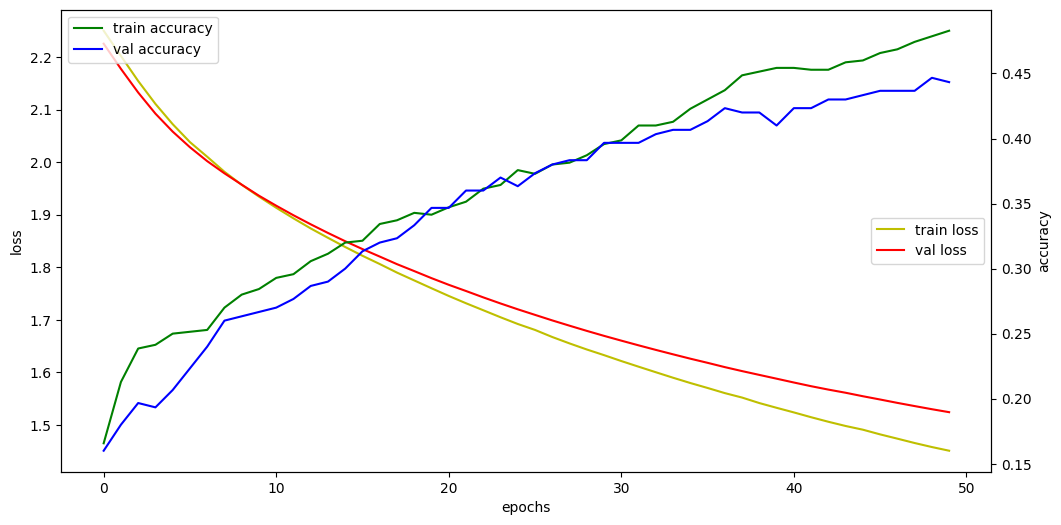

In [45]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# ※ 콜백함수2 : EarlyStopping
- val_loss 값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [52]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='elu')) # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor 기준 patience 이상 안좋은 데이터 발생 시 조기 종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2) 
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 1s 25ms/step - loss: 2.3092 - accuracy: 0.1357 - val_loss: 2.2743 - val_accuracy: 0.1800
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2497 - accuracy: 0.1886 - val_loss: 2.2176 - val_accuracy: 0.2400
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1951 - accuracy: 0.2286 - val_loss: 2.1674 - val_accuracy: 0.2667
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1460 - accuracy: 0.2686 - val_loss: 2.1246 - val_accuracy: 0.2733
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1048 - accuracy: 0.2643 - val_loss: 2.0887 - val_accuracy: 0.2700
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 2.0694 - accuracy: 0.2771 - val_loss: 2.0581 - val_accuracy: 0.2567


# ※ 콜백함수 3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [53]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='elu')) # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor 기준 patience 이상 안좋은 데이터 발생 시 조기 종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10) 
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder) : # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder) 
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath=file, # 저장 경로
                             monitor='val_accuracy', # 모니터할 지표
                             save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                             mode='max', # 값이 클수록 저장
                             verbose=1 # 저장 시 로그 출력
                            )
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint]) # 콜백함수

Epoch 1/500
1/7 [===>..........................] - ETA: 2s - loss: 2.3597 - accuracy: 0.0500
Epoch 1: val_accuracy improved from -inf to 0.12333, saving model to ./model08\mnist-001-val0.1233.h5
7/7 [==============================] - 1s 28ms/step - loss: 2.3170 - accuracy: 0.0929 - val_loss: 2.2847 - val_accuracy: 0.1233
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2785 - accuracy: 0.1700
Epoch 2: val_accuracy improved from 0.12333 to 0.20667, saving model to ./model08\mnist-002-val0.2067.h5
7/7 [==============================] - 0s 10ms/step - loss: 2.2564 - accuracy: 0.1314 - val_loss: 2.2155 - val_accuracy: 0.2067
Epoch 3/500
1/7 [===>..........................] - ETA: 0s - loss: 2.1918 - accuracy: 0.2000
Epoch 3: val_accuracy improved from 0.20667 to 0.22333, saving model to ./model08\mnist-003-val0.2233.h5
7/7 [==============================] - 0s 10ms/step - loss: 2.1946 - accuracy: 0.2114 - val_loss: 2.1532 - val_accuracy: 0.2233
Epoch 4/500
1/7 [===>....

Epoch 55/500
1/7 [===>..........................] - ETA: 0s - loss: 1.4121 - accuracy: 0.5000
Epoch 55: val_accuracy improved from 0.50000 to 0.50333, saving model to ./model08\mnist-055-val0.5033.h5
7/7 [==============================] - 0s 9ms/step - loss: 1.4094 - accuracy: 0.4700 - val_loss: 1.4318 - val_accuracy: 0.5033
Epoch 56/500
1/7 [===>..........................] - ETA: 0s - loss: 1.4588 - accuracy: 0.4300
Epoch 56: val_accuracy improved from 0.50333 to 0.51333, saving model to ./model08\mnist-056-val0.5133.h5
7/7 [==============================] - 0s 9ms/step - loss: 1.4021 - accuracy: 0.4729 - val_loss: 1.4271 - val_accuracy: 0.5133
Epoch 57/500
1/7 [===>..........................] - ETA: 0s - loss: 1.4518 - accuracy: 0.5100
Epoch 57: val_accuracy did not improve from 0.51333
7/7 [==============================] - 0s 6ms/step - loss: 1.3959 - accuracy: 0.4786 - val_loss: 1.4216 - val_accuracy: 0.5033
Epoch 58/500
1/7 [===>..........................] - ETA: 0s - loss: 1.360

In [54]:
model.evaluate(val_X, val_Y)

10/10 [==============================] - 0s 2ms/step - loss: 1.3813 - accuracy: 0.5100


[1.3813447952270508, 0.5099999904632568]